In [217]:
options(repr.plot.width=5, repr.plot.height=5)

# Schatten van de variantie

We gebruiken hier als schatter voor $\sigma^2$ de grootheid $s^2$. De formule luidt:

$$s^2 = \dfrac{\sum\left(x_i - \bar{x}\right)^2}{n-1} = \dfrac{SSE}{n-1} $$

# Chikwadraatverdeling

Stel $\underline{x}_1, \ldots, \underline{x}_n$ zijn alle kansvariabelen die standaardnormaal verdeeld zijn. Deze $x$ gaan we kwadrateren zodat we zeker weten dat deze altijd positief is. Voor een enkele trekking $\underline{x}_1$ krijgen we een Chikwadraat verdeling, aangeduidt met $\chi^2[1]$, met één vrijheidsgraad. Met meerdere trekkingen ontstaat de grootheid chikwadraat:

$$ \underline{\chi}^2[\nu] = \underline{x}_1 + \ldots + \underline{x}_n $$

waarbij $\nu$ het aantal vrijheidsgraden is.

Enkele eigenschappen zijn dat:

 1. $\textrm{E}(\underline{\chi}^2[\nu]) = \nu$.
 2. $\textrm{Var}(\underline{\chi}^2[\nu]) = 2 \nu$.

**Verdelingsfunctie plot**

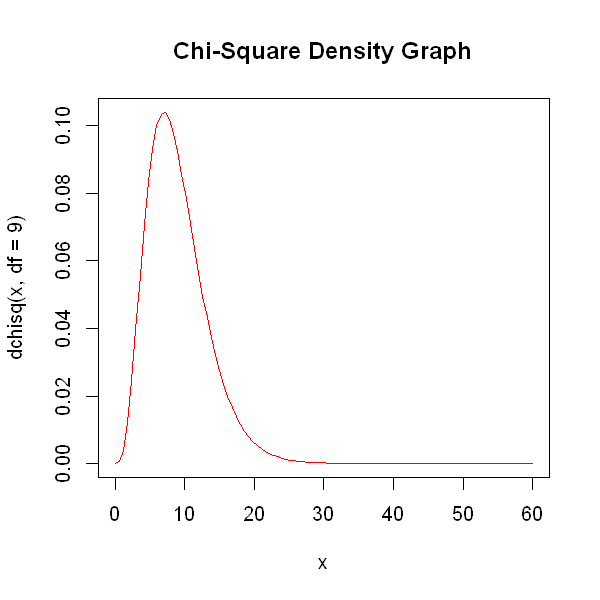

In [276]:
curve(dchisq(x, df=9), col='red', main = "Chi-Square Density Graph", 
      from=0,to=60)

**Centrale limietstelling**

De chikwadraat verdeling kan normaal benaderd worden als $\nu \rightarrow \infty$. De vuistregel hiervoor is dat $\nu > 30$. Er geldt dan dat:

$$ \chi^2[\nu] \sim N\left(\mu = \nu, \sigma = \sqrt{2\nu}\right) $$

Bij benadering gebruiken we:

$$ P(\chi^2[\nu] \leq k\ |\ \nu) \approx P(\underline{x}_{nor} \leq k\ |\ \mu = \nu, \sigma = \sqrt{2\nu} ).$$

# Betrouwbaarheidsinterval voor $\sigma^2$

Een vereiste om een betrouwbaarheidsinterval op te stellen voor $\sigma^2$ is dat de onderzochte kansvariabele $\underline{x}$ een normale verdeling volgt, of bij benadering normaal verdeeld is. De toets hiervoor staat in de volgende sectie.

Het betrouwbaarheidsinterval voor $\sigma^2$ luidt:

$$ \dfrac{\sum\left(x_i - \bar{x} \right)^2}{g_R} < \sigma^2 < \dfrac{\sum\left(x_i - \bar{x} \right)^2}{g_L} $$

met andere woorden:

$$ \dfrac{SSE}{g_{1-\frac{\alpha}{2}}} < \sigma^2 < \dfrac{SSE}{g_{\frac{\alpha}{2}}}. $$

**Voorbeeld**

In [252]:
SSE = 45
xbar = 24
df = 9
interval = c(SSE / qchisq(0.975, df=9), SSE / qchisq(0.025, df=9))
interval

[1]  2.365586 16.664263

# Toets voor $\sigma^2$

De verzamelde uitkomsten $x_1, x_2, \ldots, x_n$ van een variabele $\underline{x}$ dienen een spreiding $s^2$ te vertonen die in redelijke mate overeen komt met $\sigma^2$. Als dat niet het geval is, dan moet de nulhypothese $\textrm{Var}(\underline{x})=\sigma^2$ worden verworpen.

**Toetsingsgrootheid**

Gegeven de nulhypothese volgt de toetsingsgrootheid:

$$ \dfrac{(n-1)s^2}{\sigma^2} = \dfrac{SSE}{\sigma^2}$$

een $\chi^2[n-1]$-verdeling.

**Voorbeeld**

Stel $n=10$, $\sigma^2=15$, $SSE=45$ en $\alpha=0.05$, dan:

In [261]:
n = 10
sigma2 = 15
SSE = 45
alpha = 0.05
SSE / sigma2
pchisq(SSE / sigma2, n-1)

[1] 3

[1] 0.03570503

_Toetsprocedure_

1. $H_0$ : $\sigma^2 = 15$ en $H_A$ : $\sigma^2 \not= 15$.
2. Toetsingsgrootheid: $\dfrac{SSE}{\sigma^2} = 3$ met $\nu=n-1=9$.
3. Overschrijdingskans: $p = P(\chi^2[9] \leq 3) = \textrm{pchisq}(3,9) = 0.0357$.
4. Beslissing: $p > \frac{\alpha}{2}$ met $\alpha=0.05$, dus $H_0$ wordt niet verworpen.
5. Conclusie: De waarneming valt binnen het voorspellingsinterval van $\sigma^2$.

# Chikwadraat toets voor passing

Hiermee kunnen we toetsen of de uitkomsten een patroon vertonen dat overeenkomt met een gegeven kansverdeling. Hiervoor gaan we de waargenomen en de theoretische (vanuit de verwachte kansverdeling) uitkomsten met elkaar vergelijken.

**Toetsingsgrootheid**

Het vergelijken van de waargenomen en de theoretische frequenties gebeurt met de toetsingsgrootheid:

$$ \chi^2 = \sum \dfrac{(O_i-E_i)^2}{E_i} $$

dit wordt benaderd met $\chi^2[\nu]$ waarbij $\nu = n - 1$.

**Detail 1**

In het algemeent geldt er er voor alle $E_i \geq 5$. Indien dit niet het geval is, dan worden er klassen samemgevoegd zodanig dat dit wel het geval is.

**Detail 2**

Stel $\mu$ is onbekend, dan wordt $\mu$ bepaald door het steekproefgemiddelde (of een schatting hiervan). In dit geval gaat er een extra vrijheidsgraad verloren. Dus dan geldt er dat $\nu = n-2$.

**Voorbeeld**

We willen nagaan wat het ziekteverzuim is op verschillende dagen in de week. Hiervoor hebben we de volgende gegevens:

In [267]:
dagen = c('ma', 'di', 'wo', 'do', 'vr')
zieken = c(20, 14, 14, 12, 20)
df = data.frame(dagen, zieken)
df

dagen,zieken
ma,20
di,14
wo,14
do,12
vr,20


Men wil toetsen of het aantal ziektedagen gelijkmatig over de dagen van de week is verdeeld. Voor vijf dagen in de week zou dat betekenen dat er een kans is van $0.20$ voor elke dag.

In [275]:
O = zieken
n = sum(O)
E = rep(0.2 * n, 5)
diff = O - E
diffsq = diff*diff
diffsqdiv = diffsq / E
data.frame(dagen, O, E, diff, diffsq, diffsqdiv)
sum(diffsqdiv)

dagen,O,E,diff,diffsq,diffsqdiv
ma,20,16,4,16,1.00
di,14,16,-2,4,0.25
wo,14,16,-2,4,0.25
do,12,16,-4,16,1.00
vr,20,16,4,16,1.00


[1] 3.5

_Toetsprocedure_

1. $H_0$ : de ziektemeldingen zijn gelijkmatig verdeeld over de werkdagen. $H_A$ : ziektemeldingen zijn niet uniform verdeeld.
2. Toetsingsgrootheid: $$\sum{\dfrac{(O_i-E_i)^2}{E_i}} = 3.5$$ met een $\chi^2[4]$-verdeling.
3. Overschrijdingskans: $p = P(\chi^2[4] \geq 3.5) = \chi^2_{cdf}(3.5, 10^{99}, 4) = 0.4779$.
4. Beslissing: $p > \alpha$ met $\alpha=0.05$, dus $H_0$ wordt niet verworpen.
5. Conclusie: de geconstateerde afwijkingen kunnen heel goed aan het toeval worden toegeschreven.

# Fisher's exacte toets

In het geval dat $n < 20$, dan moet Fisher's exacte toets worden gebruikt. In het geval dat $20 < n < 40$, gebruiken we alleen de Yates correctie. In het laatste geval, als $n >40$, dan wordt er helemaal geen correctie toegepast.

Bij Fisher's exacte toets gaan we uit van een $2 \times 2$ kruistabel.

**Voorbeeld**

We willen kijken of er een verschil is in ziekte tussen docenten die wel/geen griepprik hebben gekregen.

In [5]:
griep = c(1, 4)
geen.griep = c(11, 2)
df = t(data.frame(griep, geen.griep))
colnames(df) = c('prik', 'geen.prik')
df

,prik,geen.prik
griep,1,4
geen.griep,11,2


We kiezen hier het laagste getal als basis, in dit geval is dat $1$. Hier stellen we dat $\underline{k}$ het aantal docenten is met griepprik die de griep krijgen. In dit geval is $\underline{k}$ hypergeometrisch verdeeld. Het steekproefresultaat is $1$, en we gaan de kans bepalen dat dit voorkomt.

$p = P(\underline{k} \leq 1) = P(\underline{k} = 0) + P(\underline k = 1) = \dfrac{\begin{pmatrix}12\\0\end{pmatrix}\begin{pmatrix}6\\5\end{pmatrix}}{\begin{pmatrix}18\\5\end{pmatrix}} + \dfrac{\begin{pmatrix}12\\1\end{pmatrix}\begin{pmatrix}6\\4\end{pmatrix}}{\begin{pmatrix}18\\5\end{pmatrix}} = 0.0217.$

We kunnen dit ook met R bepalen:

In [6]:
fisher.test(df)


	Fisher's Exact Test for Count Data

data:  df
p-value = 0.02171
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.0008583686 0.9414807659
sample estimates:
odds ratio 
0.05873784 


_Toetsprocedure_

1. $H_0$ : Er is geen verschil in de griep krijgen tussen docenten met/zonder griepprik en $H_A$ : Er is wel een verschil.
2. Toetsingsgrootheid: $\underline{k} \sim \textrm{hypergeometrisch}$.
3. Overschrijdingskans: $p = 0.0217$.
4. Beslissing: $p \leq \alpha$ ($\alpha=0.05$) dus $H_0$ verwerpen.
5. Conclusie: De docenten met de griepprik krijgen significant minder griep.

# Yates correctie

Indien er wordt voldaan aan de volgende drie voorwaarden:

 1. $20 < n < 40$.
 2. Voor alle $E_{ij}$'s geldt dat $E_{ij} > 1$.
 3. $80\%$ van alle $E_{ij}$'s is groter dan $5$.
 
dan wordt de Yates correctie toegepast. Dit geeft een nieuwe toetsingsgrootheid, namelijk:

$$ \sum\limits_{i=1}^r \sum\limits_{j=1}^c \dfrac{\left(\left| O_{ij} - E_{ij}\right| - 0.5\right)^2 }{E_{ij}}. $$

Doormiddel van de Yates correctie, wordt de toets convervatiever. Hierdoor wordt de nulhypthese minder snel verworpen en is de toets iets veiliger.

# T-verdeling

De t-verdeling kent een geschatte standaarddeviatie, terwijl de normale verdeling een exacte bekende standaarddeviatie heeft.

$$ \underline{t} = \dfrac{\overline{\underline x} - \mu}{\frac{\underline{s}}{\sqrt{n}}} $$

waarbij $\underline s$ een schatting is, en bepaald door:

$$ \underline{s} = \sqrt{  \dfrac{\sum\left(X_i - \underline{\overline X}\right)^2}{n-1}  } $$

Bij het opstellen van een betrouwbaarheidsinterval voor $\mu$ voor een continue variabele hebben we de volgende mogelijkheden:

 1. Normale verdeling + gegeven $\sigma\rightarrow$ de normale verdeling gebruiken.
 2. Normale verdeling + onbekende $\sigma \rightarrow$ de t-verdeling gebruiken als $n\leq 30$ en anders de normale verdeling.
 3. Willekeurige verdeling + onbekende $\sigma \rightarrow$ de t-verdeling gebruiken.

**Verdelingsfunctie plot**

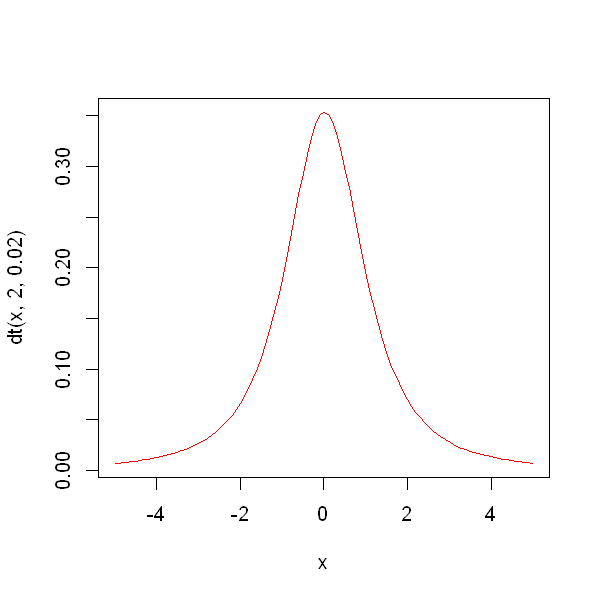

In [227]:
curve(dt(x,2,0.02), col='red', from=-5, to=5)

De t-verdeling lijkt bijna op de normale verdeling. Het verschil is dat de t-verdeling een dikkere staart heeft.

# Betrouwbaarheidsinterval voor $\mu$ bij onbekende $\sigma$

$$ \bar{x} - t \cdot \dfrac{s}{\sqrt n} < \mu < \bar{x} + t \cdot \dfrac{s}{\sqrt n} $$

**Voorbeeld**

In [90]:
x = 16
s = 1.34
n = 10
alpha = 0.05
t = abs(qt(alpha/2, n-1))
interval = c(x - t * s / sqrt(n), x + t * s / sqrt(n))
interval

[1] 15.04142 16.95858

# t-Toets voor één gemiddelde

Bij veel toepassingen in de praktijk is de standaarddeviatie niet gegeven en dus moet deze worden geschat. Zoals we hebben gezien leidt het schatten tot het gebruik van de t-verdeling met $\nu = n-1$ vrijheidsgraden.

**Toetsingsgrootheid**

Hiervoor berekenen we de $t$-waarde met: 

$$t^* = \dfrac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

**Voorbeeld**

Bij een visverwerkende industrie wordt het afvalwater voortdurend gecontroleerd op verontreiniging. Afhankelijk van de hoeveelheid geloosde vervuilingseenheden (VE's) moet een mileuheffing worden afgedragen aan de overheid. Het bedrijf stelt dat gemiddeld hoogstens 200 VE's per dag worden geloosd. Toets of de uitspraak van het bedrijf klopt.

In [12]:
dag = 1:10
VE = c(190, 250, 320, 410, 310, 280, 230, 370, 350, 290)
n = length(VE)
df = t(data.frame(dag, VE))
df

dag,1,2,3,4,5,6,7,8,9,10
VE,190,250,320,410,310,280,230,370,350,290


In [26]:
mean(VE)

[1] 300

In [23]:
t = (mean(VE) - 200) / (sd(VE) / sqrt(n))
t

[1] 4.743416

In [24]:
qt(0.975, 9)

[1] 2.262157

Het is duidelijk dat $t$ in het kritieke gebied $Z = \left[2.2621; \rightarrow\right>$ ligt.

In [25]:
1 - pt(4.7434, 9)

[1] 0.0005269478

_Toetsprocedure_

1. $H_0$ : $\mu \leq 200$ en $H_A$ : $\mu > 200$.
2. Toetsingsgrootheid: $t^* = 4.7434 \sim t[9]$.
3. Overschrijdingskans: $p = P(t[9] \geq 4.7434) = 1 - P(t[9] \leq 4.7434) = 1 - \textrm{pt}(4.7434, 9) = 0.0005269$.
4. Beslissing: $p \leq \alpha$ dus $H_0$ verwerpen.
5. Conclusie: De uitspraak van het bedrijf wordt niet juist bevonden.

# Verschiltoets voor $\mu$ met bekende $\sigma$

In de praktijk komt het nogal eens voor dat er steekproeven worden genomen uit twee populaties, waarbij de vraag naar voren komt of een kansvariabele voor beide populaties dezelfde waarde voor de verwachtingswaarde $\mu$ heeft. In de eerste situatie kijken we naar twee normaal verdeelde kansvariabelen $\underline{x}$ en $\underline{y}$ waarvoor de varianties $\sigma^2_x$ en $\sigma^2_y$ gegeven zijn.

**Hypothese**

Voor de verschiltoets werken we vaak met de hypothese dat $H_0 : \mu_x = \mu_y$ en $H_A : \mu_x \not= \mu_y$.

**Toetsingsgrootheid**

Om de toets uit te voeren definiëren we de verschilvariabele $\nu = \underline{\overline x} - \underline{\overline y}$. De bijbehorende toetsingsgrootheid is:

$$ \underline \nu \sim N\left(\mu_\nu = 0; \sigma_\nu = \sqrt{\dfrac{\sigma^2_x}{n} + \dfrac{\sigma^2_y}{m}} \right) $$

**Betrouwbaarheidsinterval**

Een betrouwbaarheidsinterval voor $\mu_x - \mu_y$ kan worden bepaald met:

$$ \left( \underline{\overline x} - \underline{\overline y} \right) - z_{1-\frac{1}{2}\alpha} \cdot \sqrt{\dfrac{\sigma^2_x}{n} + \dfrac{\sigma^2_y}{m}} < \mu_x - \mu_y < \left( \underline{\overline x} - \underline{\overline y} \right) + z_{1-\frac{1}{2}\alpha} \cdot \sqrt{\dfrac{\sigma^2_x}{n} + \dfrac{\sigma^2_y}{m}}  $$

**Voorbeeld**

Gegeven is dat $n_x = 10$, $\bar{X} = 50$, $n_y = 5$, en $\bar{Y} = 55$. Toets of beide dezelfde verwachtingswaarde kunnen hebben.

In [36]:
n = 10; m = 5
xbar = 50; ybar = 55
xvar = 100; yvar = 30
sigma = sqrt(xvar / n + yvar / m)
v = xbar - ybar
pnorm(v, 0, sigma)

[1] 0.1056498

_Toetsprocedure_

1. $H_0$ : $\mu_x = \mu_y$ en $H_A$ : $\mu_x \not= \mu_y$.
2. Toetsingsgrootheid: $\nu = \underline{\overline x} - \underline{\overline y} = -5 \sim N(\mu_\nu = 0, \sigma_\nu = 4)$.
3. Overschrijdingskans: $p = P(\underline{v} \leq -5) = \textrm{normal}_{cdf}(-10^{99}, -5, 0, 4) = 0.1056$.
4. Beslissing: $p \leq \alpha$ ($\alpha=0.05$) dus $H_0$ wordt niet verworpen.
5. Conclusie: De steekproefgemiddelden zijn mogelijk gelijk aan elkaar.

# Verschiltoets voor $\mu$ met een onbekende $\sigma$

Als de variantie van de kansvariabele niet is gegeven, kunnen we niet meteen de toets uitvoeren, maar moeten we eerst een schatting maken van $\sigma^2$.

**Variant A (gelijke $\sigma$)**

Veronderstel dat we aan mogen nemen dat de onbekende varianties van de variabelen aan elkaar gelijk zijn. (In de praktijk moeten we dit eerst toetsen met de F-verdeling.) We bepalen voor beide variabelen de variantie en deze kunnen dan worden gecombineerd tot één schatter, die als volgt wordt gedefineerd:

$$s_p^2 = \dfrac{(n-1)s_x^2 + (m-1)s_y^2}{(n-1)+(m-1)} \quad \textrm{(pooled variance principe)}$$

waarbij de bijbehorende $t$-verdeling $df=n+m-2$ vrijheidsgraden heeft.

**Variant B (ongelijke $\sigma$)**

Als de variantieschattingen onderling sterk verschillen, mag de pooled variance methode niet worden toegepast. In dit geval gebruiken we de schatting:

$$ s_\nu = \sqrt{\dfrac{s^2_x}{n} + \dfrac{s^2_y}{m}} $$

waarbij de $t$-verdeling $df=\min(m,n)-1$ vrijheidsgraden heeft. Deze formule is een veilige methode om het aantal vrijheidsgraden te bepalen. SPSS gebruikt een nauwkeurigere methode om het aantal vrijheidsgraden te bepalen.

**Betrouwbaarheidsinterval**

Een betrouwbaarheidsinterval voor $\mu_x - \mu_y$ kan worden bepaald met:

$$ \nu - ts_\nu < \mu_x - \mu_y < \nu + ts_\nu. $$

We hoeven hier niet te delen door $\sqrt{n}$ omdat dit effect al zit verwerkt in $s_\nu$.

# Gepaarde t-toets

Bij toepassing van de $t$-toets als verschiltoets wordt er wél aandacht geschonken aan de grootte van de waargenomen verschillen. Gegeven zijn $n$ waargenomen getallenparen $(x_i, y_i)$. Deze paren worden met $v_i = y_i - x_i$ omgezet in $n$ waargenomen verschillen.

**Toetsingsgrootheid**

$$\underline{\overline v} : \textrm{gemiddelde verschil} \sim t[n-1] $$

**Voorbeeld**

Een farmaceutische onderneming neemt een vermageringspil te hebben ontdekt waarbij de proefpersonen niet van eetgewoonte hoeven te veranderen. De resultaten zien we in de tabel:

In [37]:
gewicht.voor = c(80, 86, 66, 75, 90, 68, 78, 70)
gewicht.na = c(75, 78, 68, 71, 84, 65, 73, 67)
gewicht.verschil = gewicht.na - gewicht.voor
df = t(data.frame(gewicht.voor, gewicht.na, gewicht.verschil))
df

gewicht.voor,80,86,66,75,90,68,78,70
gewicht.na,75,78,68,71,84,65,73,67
gewicht.verschil,-5,-8,2,-4,-6,-3,-5,-3


In [41]:
vbar = mean(gewicht.verschil)
t = vbar / (sd(gewicht.verschil) / sqrt(length(gewicht.verschil)))
t
pt(t, length(gewicht.verschil) - 1)

[1] -3.864367

[1] 0.003088252

# F-verdeling

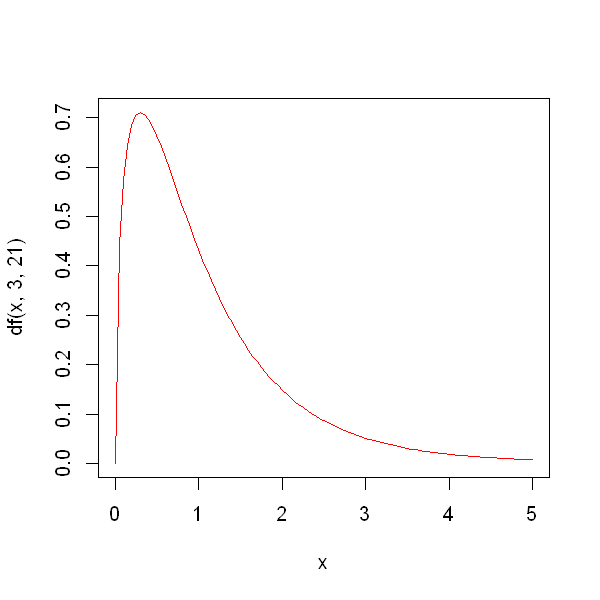

In [240]:
curve(df(x,3,21), col='red', from=0, to=5)

# Harmonisch gemiddelde

Het harmonisch gemiddelde is een speciaal gemiddelde, van toepassing bij het berekenen van gemiddelden van verhoudingsgetallen [[Wikipedia](https://nl.wikipedia.org/wiki/Harmonisch_gemiddelde)]. 

$$\bar{n}_h = \dfrac{c}{\frac{1}{n_1} + \frac{1}{n_2} + \ldots + \frac{1}{n_c}} = c \left( \sum\limits_{j=1}^c\dfrac{1}{n_j}\right)^{-1}$$

In [88]:
X = c(2,6,2,5,3,6,3)
mean(X)               # arithmetic mean
length(X) / sum(1/X)  # harmonic mean

[1] 3.857143

[1] 3.181818

# Pooled-variance principe

Het is mogelijk om varianties samen te voegen met het pooled-variance principe. De formule hiervoor is als volgt:

$$ s_2 = \dfrac{(n_1 - 1)s_1^2 + \ldots + (n_k - 1)s_k^2}{(n_1 - 1) + \ldots + (n_k - 1)} $$

waarbij $k$ het aantal varianties zijn.

# ANOVA (één-factor model)

**Hypothese**

De hypothese die we toetsen is $H_0 : \mu_1 = \mu_2 = \mu_3$, en $ H_A $ : de populatiegemiddelden zijn niet gelijk aan elkaar.

**Toetsingsgrootheid**

Om de ANOVA analyse te doen berekenen we de volgende grootheden:

**Sum of Squares Total**:

$$SST = \sum\limits_{j=1}^c \sum\limits_{i=1}^{n_j}\left( X_{ij} - \bar{X}_{\cdot \cdot}\right)^2; MST = \dfrac{SST}{n-1}$$
 
**Sum of Squares Error**:

$$SSE = \sum\limits_{j=1}^c \sum\limits_{i=1}^{n_j}\left( X_{ij} - \bar{X}_{\cdot j}\right)^2; MSE = \dfrac{SSE}{n-c}$$
 
**Sum of Squares Groups**:

$$SSG = \sum\limits_{j=1}^c n_j \left( \bar{X}_{\cdot j} - \bar{X}_{\cdot \cdot}\right)^2; MSG = \dfrac{SSG}{c-1}$$

waarbij $n$ het totaal aantal waarnemingen is en $c$ het aantal groepen. Hiervoor geldt er dat $SST = SSG + SSE$.

**ANOVA tabel**

Met de berekende waarden kunnen we de volgende tabel opstellen:

|ANOVA|vrijheidsgraden ($df$)|Sum of Squares|Mean of Squares|F-ratio|
|--|--|--|--|--|
|Groepen (G)|$c-1$|$SSG$|$MSG$|$\frac{MSG}{MSE}$|
|Binnen (E)|$n-c$|$SSE$|$MSE$||
|Totaal (T)|$n-1$|$SST$||

**Voorbeeld**

In [182]:
economie = c(35, 10, 47, 23, 35, 59, 32, 44, 18, 27)
techniek = c(52, 38, 45, 37, 60, 48, 54, 66)
gezondheidszorg = c(18, 24, 10, 48, 20, 12, 36, 24)
n1 = length(economie); n2 = length(techniek); n3 = length(gezondheidszorg)
Y = c(economie, techniek, gezondheidszorg)

In [207]:
SST = sum((economie - mean(Y))^2) + 
      sum((techniek - mean(Y))^2) + 
      sum((gezondheidszorg - mean(Y))^2)

SSE = sum((economie - mean(economie))^2) + 
      sum((techniek - mean(techniek))^2) + 
      sum((gezondheidszorg - mean(gezondheidszorg))^2)
          
SSG = n1 * (mean(economie) - mean(Y))^2 + 
      n2 * (mean(techniek) - mean(Y))^2 + 
      n3 * (mean(gezondheidszorg) - mean(Y))^2

MST = SST / (length(Y) - 1)
MSE = SSE / (length(Y) - 3)
MSG = SSG / 2
F = MSG / MSE
p = df(F, df1=2, df2=23) # met df1 = c-1 en df2 = n-c
print(paste('De f-waarde is', F, 'met een p-waarde van', p))

[1] "De f-waarde is 8.65886826768073 met een p-waarde van 0.000897214262039324"


Het kritieke gebied kunnen we bepalen met:

In [208]:
qf(.95, df1=2, df2=23)

[1] 3.422132

In dit geval is het kritieke gebied: $Z = \left[3.42; \rightarrow\right>$. Hier wordt $H_0$ duidelijk verworpen.

_Toetsprocedure_

1. $H_0$ : $\mu_1 = \mu_2 = \mu_3$ en $H_A$ : de populatiegemiddelden zijn niet gelijk aan elkaar.
2. Toetsingsgrootheid: $F = \dfrac{MSG}{MSE} = 8.6589 \sim F_{[\nu_1, \nu_2]}$ met $\nu_1=2$ en $\nu_2=23$.
3. Overschrijdingskans: $p = P(F_{[2,23]}\geq 8.6589) = 0.0008972$.
4. Beslissing: $p \leq \alpha$ ($\alpha=0.05$) dus $H_0$ verwerpen.
5. Conclusie: De drie populaties studenten hebben niet alle drie hetzelfde gemiddelde aantal uren internetgebruik.

# Ongelijke steekproefgroottes

Bij ongelijke steekproefgroottes is $E(\bar{X}_{\cdot \cdot})$ geen zuivere schatter voor $\mu$. De oplossing hiervoor is als volgt:

$$SSG = \bar{n}_h \sum\limits_{j=1}^c\left( \bar{X}_{\cdot j} - \bar{G}_{\cdot \cdot}\right)^2 $$

waarbij $\bar{n}_h$ het harmonisch gemiddelde is en

$$ \bar{G}_{\cdot \cdot} = \dfrac{\sum\limits_{j=1}^c\left( \bar{X}_j \right)}{c}.$$ 

In het geval van ongelijke steekproefgroottes geldt dat $SST \not = SSG + SSE$.

# Levene's toets

Met Levene's toets kunnen we toetsen of populatievarianties mogelijk gelijk zijn aan elkaar. Dit is een vereiste voor de ANOVA analyse. Hierbij stellen we als $H_0$ dat de populatievarianties gelijk zijn aan elkaar en willen we dit niet verwerpen.

**Toetsingsgrootheid**

$$ F_L = \dfrac{\left( \sum\limits_{j=1}^c n_j \left( \bar{Z}_{\cdot j} - \bar{Z}_{\cdot \cdot}\right)^2\right) / (c-1)}{\left( \sum\limits_{j=1}^c \sum\limits_{i=1}^{n_j} \left( \bar{Z}_{ij} - \bar{Z}_{\cdot j} \right)^2\right) / (n-c)} = \dfrac{MSG}{MSE} \sim F_{(\nu_1, \nu_2)} $$

waarbij $Z_{ij} = \left|\ X_{ij} - \bar{X}_{\cdot j}\ \right|$.

**Beslissing**

Als $p > \alpha$ dan wordt $H_0$ niet verworpen. De populatievarianties kunnen aan elkaar gelijk zijn.

# Bonferoni methode

Een post-hoc analyse kan worden toegepast zodra $H_0$ wordt verworpen bij de variantieanalyse. Een methode hiervoor is de Bonferoni methode. De vraag die willen beantwoorden is welke $\mu_j$'s niet samenvallen.

Dit kunnen we doen door het paarsgewijs vergelijken van de steekproefgemiddelden m.b.v. de t-toets. Als er drie groepen zijn dan moeten we $k=\begin{pmatrix}c\\2\end{pmatrix}$ paren die we moeten toetsen. Voor een significantie van $\alpha=0.05$ krijgen we bij herhalen van de t-toets:

In [105]:
1-(1-0.05)**6

[1] 0.2649081

Er is dus een kans van $26\%$ dat er een fout van eerste soort optreedt. Om dit op te lossen toetsen we met $\frac{\alpha}{2\cdot k}$ als we tweezijdige toetsen en $\frac{\alpha}{k}$ bij een enkelzijdige toets. Volgens BK is deze methode te rigoreus, zij komen met de Tukey's HSD methode.

**Hypothese**

De hypothese die we toetsen is $H_0 : \mu_i = \mu_j$ en $H_A : \mu_i \not= \mu_j$.

**Toetsingsgrootheid**

De te gebruiken toetsingsgrootheid voor de Bonferoni methode is als volgt:

$$ \dfrac{\left( \overline{\underline X}_{\cdot i} - \overline{\underline X}_{\cdot j}\right) - \left( \mu_i - \mu_j \right)}{\sqrt{MSE} \cdot \sqrt{\frac{1}{n_i} + \frac{1}{n_j}}} \sim t[\nu] $$

waarbij $\nu = n-c$.

**Beslisregel**

In dit geval is het makkelijker om te toetsen met het kritieke gebied i.p.v. de overschijdingskans. Het kritieke gebied kunnen we bepalen met:

$$ Z = \left<\leftarrow; P(\underline{t}[\nu] \leq L) = \frac{\alpha}{2k} \right] \cup \left[P(\underline{t}[\nu] \geq R) = \frac{\alpha}{2k}; \rightarrow \right> $$

**Conclusie**

Zodra $H_0$ wordt verworpen is er een significant verschil aangetoond. Dus $\mu_i < \mu_j$, of andersom. Dit wordt bepaalt door te kijken welk gemiddelde het laagst/hoogst is.

# Tukey's HSD methode

De Tuckey's HSD (honestly significant difference) gebruikt een waarde die is af te lezen vanuit een tabel. Dit is tabel 3, de verdeling van $V$ voor Tukey's HSD procedure.

_Toetsprocedure_

1. $H_0$ : $\mu_i = \mu_j$ en $H_A$ : $\mu_i \not= \mu_j$.
2. Toetsingsgrootheid: $V$.
3. Beslisregel: $Z = \left[r;\rightarrow\right>$ met $P(v\geq r\ |\ c; \nu_t)$. Hier geldt dat $a=c$ het aantal groepen is. Deze waarde wordt afgelezen uit tabel 3.
4. Beslissing: Als $x \in Z$ dan wordt $H_0$ verworpen, als $x \not\in Z$ dan wordt $H_0$ niet verworpen.

# Maat voor effectgrootte

Een maat voor effectgrootte $\eta^2$, eta kwadraat, geeft het percentage van de variantie v/d scores op de afhankelijke variabele dat door de onafhankelijke variabele wordt verklaard.

 $$ \eta^2 = \dfrac{SSG}{SST} : \textrm{effectgrootte} $$
 
Dit geldt voor een gelijke steekproefgrootte.

# Rangtekentoets (Wilcoxon Signed Rank test)

Het doel van de analyse is een verschil aantonen tussen twee _afhankelijke/gekoppelde_ groepen op een ordinale variabele.

**Stappenplan**

1. Maak een tabel met de experimentele groep $E$ en de controle groep $C$.
2. Bepaal het verschil $D_i = E_i - C_i$.
3. Bepaal hat absolute verschil $|\ D_i\ |$.
4. Bepaal de rangnummers $R_i$ van het absolute verschil.
5. Bepaal het teken voor $R_i$, dus $\textrm{sign}(D_i) \cdot R_i$.
6. Bepaal $W_+$ wat de som is van alle _positieve_ rangnummers.
7. Zodra $W_+$ en $n$ bepaald zijn kunnen we de $p$-waarde opzoeken in tabel 10.

Alle verschilscores waarvoor geldt dat $D_i = 0$ moeten worden verwijderd. Indien dit het geval is dat wordt ook de $n$ aangepast. In het geval van gelijke rangnummers, m.a.w. knopen, nemen we het gemiddelde van de rangnummers.

**Toetsingsgrootheid**

De toetsingsgrootheid is $W_+$. Dit is de som is van alle positieve rangnummers. Voor $W_+$ geldt dat:

 * $\textrm{E}(W_+) = \dfrac{n(n-1)}{4}$
 * $\textrm{Var}(W_+) = \dfrac{n(n+1)(2n+1)}{24}$

**Centrale limietstelling**

Het blijkt dat we $W_+$ normaal kunnen benaderen als $n \rightarrow \infty$. De vuistregel hiervoor is $n > 15$. In dit geval geldt dat:

$$ W_+ \sim N\left(\mu=\dfrac{n(n-1)}{4}; \sigma=\sqrt{\dfrac{n(n+1)(2n+1)}{24}}\right)$$

Bij benadering gebruiken we:

$$ P(W_+ \leq k) \approx P\left(X_{nor} \leq k + \frac{1}{2}\ |\ \mu, \sigma\right) $$

**Voorbeeld**

Voor patienten met depressieve klachten is er een experiment opgezet. Hiervoor is $X$ de score op de vragenlijst ($0\leq X \leq 100$). Hoe hoger de score, hoe erger de klachten. Er zijn 10 gematchte paren gemaakt (personen met dezelfde score op de vragenlijst).

De experimentele groep $E$ krijgt een behandeling met hardlopen en de controle groep $C$ krijgt een behandeling zonder hardlopen. Toets of het hardlopen effect heeft.

In [56]:
E = c(70, 60, 55, 80, 40, 68, 54, 71, 70, 40)
C = c(75, 62, 65, 77, 49, 60, 63, 78, 59, 55)
D = E-C
D.abs = abs(D)
R = c(4, 1, 8, 2, 7, 6, 3, 5, 9, 10)
R.sign = sign(D) * R
df = t(data.frame(E, C, D, D.abs, R, R.sign))
df

E,70,60,55,80,40,68,54,71,70,40
C,75,62,65,77,49,60,63,78,59,55
D,-5,-2,-10,3,-9,8,-9,-7,11,-15
D.abs,5,2,10,3,9,8,9,7,11,15
R,4,1,8,2,7,6,3,5,9,10
R.sign,-4,-1,-8,2,-7,6,-3,-5,9,-10


In [67]:
W_pos = sum(R.sign[R.sign > 0])
W_pos

[1] 17

_Toetsprocedure_

1. $H_0$ : $\eta_E = \eta_C$ en $H_A$ : $\eta_E < \eta_C$.
2. Toetsingsgrootheid: $W_+ = 17$ met $n=10$.
3. Overschrijdingskans: $p = P(W_+\leq 17) \stackrel{\textrm{Tabel 10}}{=} 0.161$.
4. Beslissing: $p \leq \alpha$ ($0.10$) dus $H_0$ niet verwerpen.
5. Conclusie: Er is geen significant verschil in toetsscores.

# Wilcoxon som toets (Mann-Whitney toets)

Het doel van de analyse is een verschil aantonen tussen twee _onafhankelijke_ groepen op een ordinale variabele.

 * Groepsvariabele : middel (groep 1: geneesmiddel, groep 2: placebo)
 * Testvariabele : mate van aggresief gedrag (testscore 1-100)
 
**Stappenplan**

1. Sorteer beide testscores, zowel $X$ als $Y$.
2. Bepaal de rangnummers voor $X$ en $Y$.
3. Bepaal de som voor elke groep, dus $S_x$ en $S_y$ waarbij de $S$ staat voor som.
4. Zodra $m$, $n$ en $S_x$ bepaald zijn kunnen we de $p$-waarde opzoeken in tabel 11.

Let er op dat geldt dat $m \leq n$, indien dit niet het geval is kunnen $X$ en $Y$ worden omgewisselt.

**Toetsingsgrootheid**

De toetsingsgrootheid is $S_x$ waarbij $S$ staat voor de som. Dit is de som van alle rangnummers van $X$. Voor $S_x$ geldt er dat:

 * $\textrm E(S_x) = \frac{m(m+n+1)}{2}$
 * $\textrm{Var}(S_x) = \frac{nm(n+m+1)}{12}$
 
**Centrale limietstelling**

Het blijkt dat we $S_x$ normaal kunnen benaderen als $n, m \rightarrow \infty$. Hiervoor geldt dat:

$$S_x \sim N\left(\mu=\frac{m(m+n+1)}{2}; \sigma=\sqrt{\frac{nm(n+m+1)}{12}}\right)$$ 

De vuistregel om te mogen benaderen eist dat $m, n > 10$. Hiervoor gebruiken we:

$$ P(S_x \leq k) \approx P\left(X_{nor} \leq k + \frac{1}{2}\ |\ \mu, \sigma\right) $$
 
**Voorbeeld**

Voor twee groepen $A$ en $B$ wordt er een vitaminepil gegeven. Groep $A$ is vertelt dat het een prestatieverhogend middel is en voor groep $B$ een slaapmiddel. 

In [46]:
groep.a = c(36, 41, 44, 45, 52, 53, 54, 57, 58, 77)
groep.b = c(26, 46, 55, 59, 64, 65, 67, 79, 81, 83)
rank.a = c(2, 3, 4, 5, 7, 8, 9, 11, 12, 17)
rank.b = c(1, 6, 10, 13, 14, 15, 16, 18, 19, 20)
t(data.frame(groep.a, groep.b, rank.a, rank.b))

groep.a,36,41,44,45,52,53,54,57,58,77
groep.b,26,46,55,59,64,65,67,79,81,83
rank.a,2,3,4,5,7,8,9,11,12,17
rank.b,1,6,10,13,14,15,16,18,19,20


In [49]:
Sa = sum(rank.a)
Sa

[1] 78

_Toetsprocedure_

1. $H_0$ : $\eta_A = \eta_B$ en $H_A$ : $\eta_A < \eta_B$.
2. Toetsingsgrootheid: $S_A = 78$ met $m=n=10$.
3. Overschrijdingskans: $p = P(S_A \leq 78) \stackrel{\textrm{Tabel 11}}{=} 0.022$.
4. Beslissing: $p \leq \alpha$ dus $H_0$ verwerpen.
5. Conclusie: De suggestie doet zijn werk.